<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Estat%C3%ADstica/Regress%C3%A3o/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Machine Learning - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [ ]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Dados/Consumo_cerveja.json'
dados = pd.read_json(url)
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [ ]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

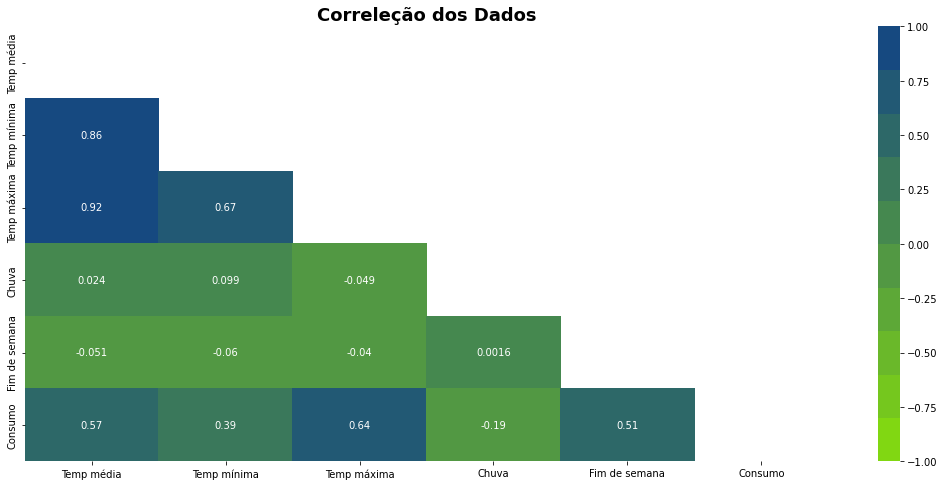

In [ ]:
import seaborn as sns
labels = ['Temp média','Temp mínima','Temp máxima','Chuva','Fim de semana','Consumo']
plt.figure(figsize=(18, 8))
cmap = sns.color_palette('blend:#81d712,#164980', 10)
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
ax = sns.heatmap(dados.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask = mask)
ax.set_title('Correleção dos Dados', fontsize = 18, weight = 'bold')
ax.set_xticklabels(labels,fontsize = 10)
ax.set_yticklabels(labels,fontsize = 10)
plt.show()

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

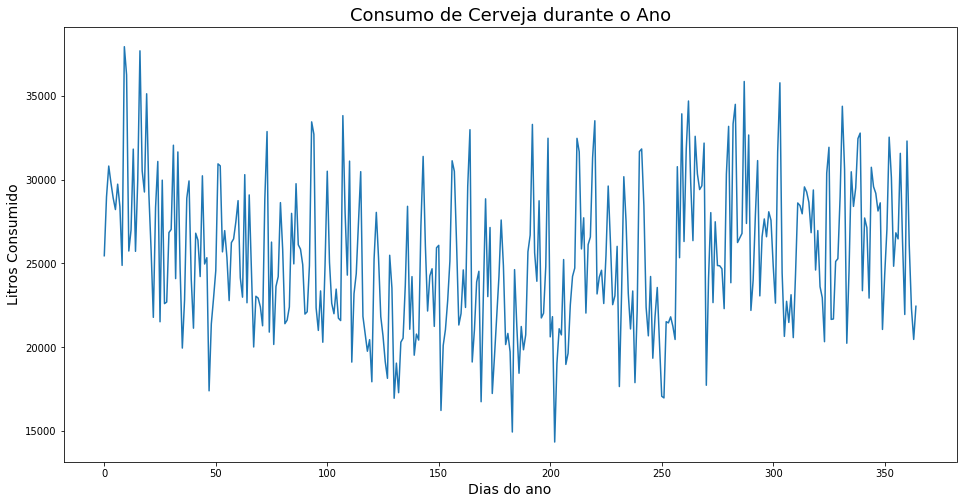

In [ ]:
fig,ax = plt.subplots(figsize = (16,8))
ax.set_title('Consumo de Cerveja durante o Ano', fontsize = 18)
ax.set_ylabel('Litros Consumido', fontsize = 14)
ax.set_xlabel('Dias do ano',fontsize = 14)

ax = dados['consumo'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot </font>
<hr style='border: 2px solid red;'>

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Litro consumidos')

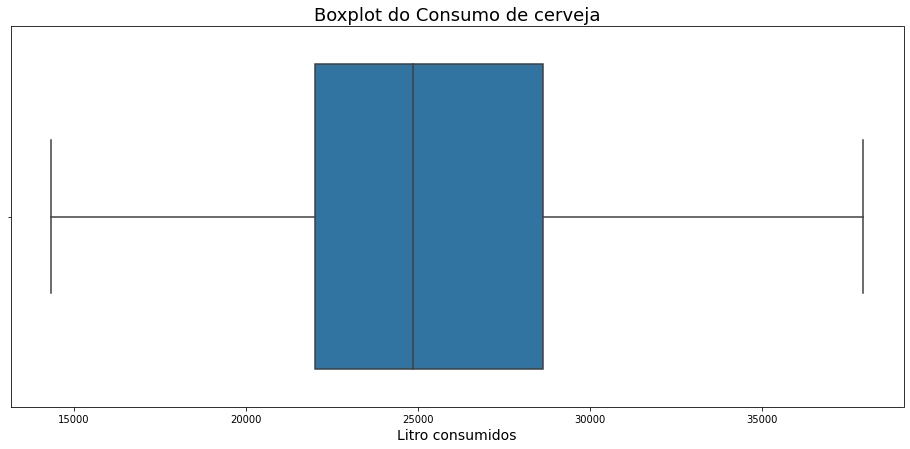

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Boxplot do Consumo de cerveja', fontsize = 18)
ax = sns.boxplot(dados.consumo)
ax.set_xlabel('Litro consumidos',fontsize = 14)


# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0, 0.5, 'Final de Semana')

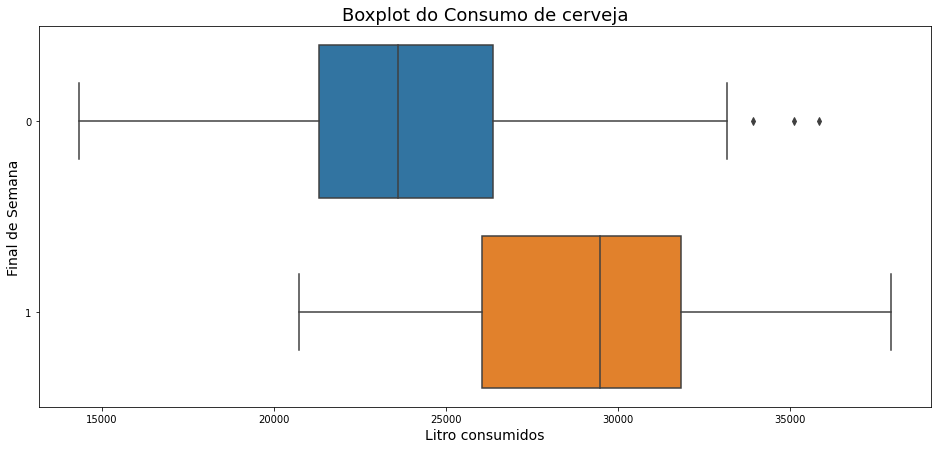

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Boxplot do Consumo de cerveja', fontsize = 18)
ax = sns.boxplot( x = 'consumo', y = 'fds',data = dados, orient = 'h')
ax.set_xlabel('Litro consumidos',fontsize = 14)
ax.set_ylabel('Final de Semana',fontsize = 14)

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
sns.set_palette("Accent")

In [ ]:
sns.set_style("white")

Text(0, 0.5, 'Final de Semana')

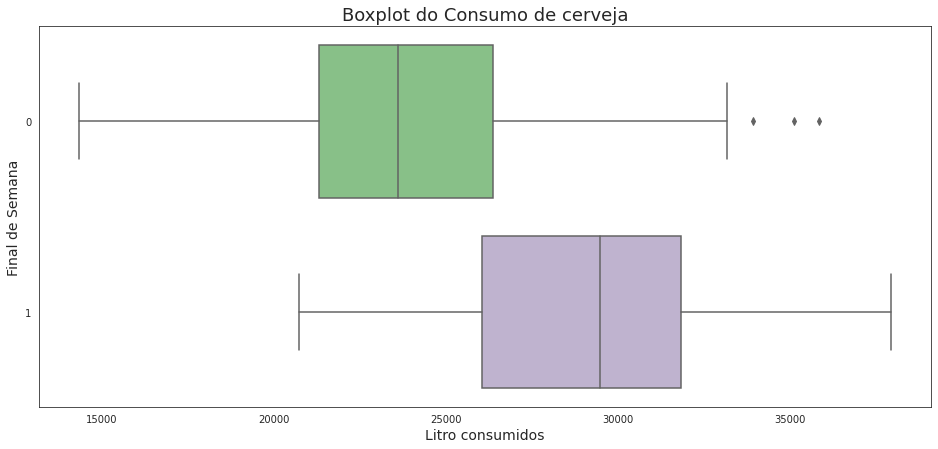

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Boxplot do Consumo de cerveja', fontsize = 18)
ax = sns.boxplot( x = 'consumo', y = 'fds',data = dados, orient = 'h')
ax.set_xlabel('Litro consumidos',fontsize = 14)
ax.set_ylabel('Final de Semana',fontsize = 14)

In [ ]:
dados.query('fds== 0 and consumo >=33500')

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
19,20/01/2015,27.68,23.3,35.6,0.6,0,35127
259,17/09/2015,27.26,20.4,33.0,0.0,0,33930
287,15/10/2015,28.12,18.9,35.8,0.0,0,35861


In [ ]:
dados.query('fds== 0 and consumo <=30000')['temp_max'].mean()

26.326639344262293

Provavelmente nesses dias da semana que são outliers ocorreram porque a tempearatura estava mais alta. É algo a ser analisados

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Litro consumidos')

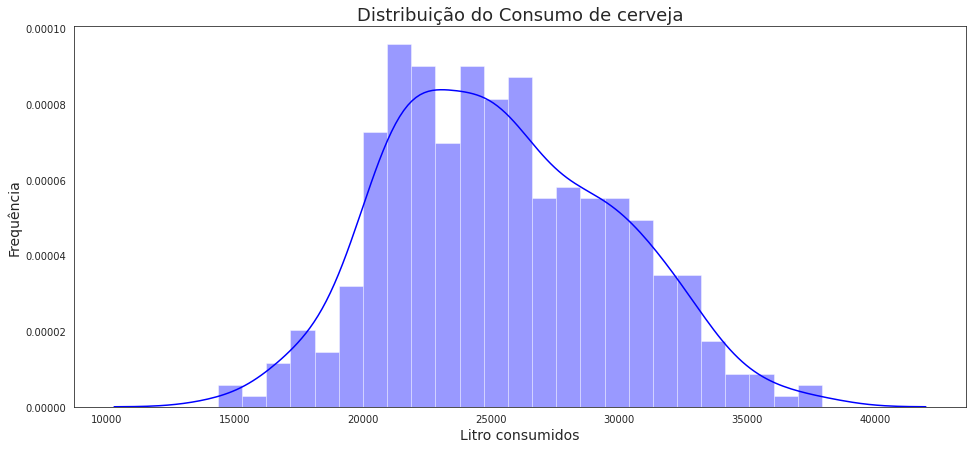

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax = sns.distplot(dados.consumo, bins = 25,kde = True, color='Blue')
ax.set_title('Distribuição do Consumo de cerveja', fontsize = 18)
ax.set_ylabel('Frequência',fontsize = 14)
ax.set_xlabel('Litro consumidos',fontsize = 14)


# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

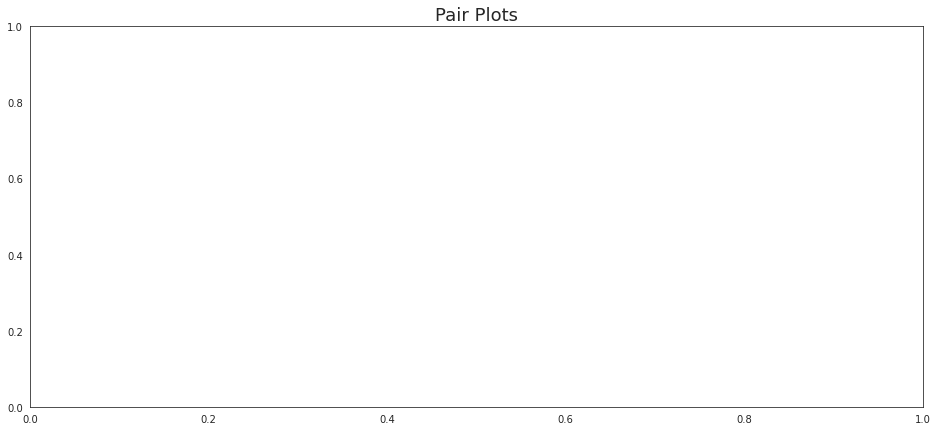

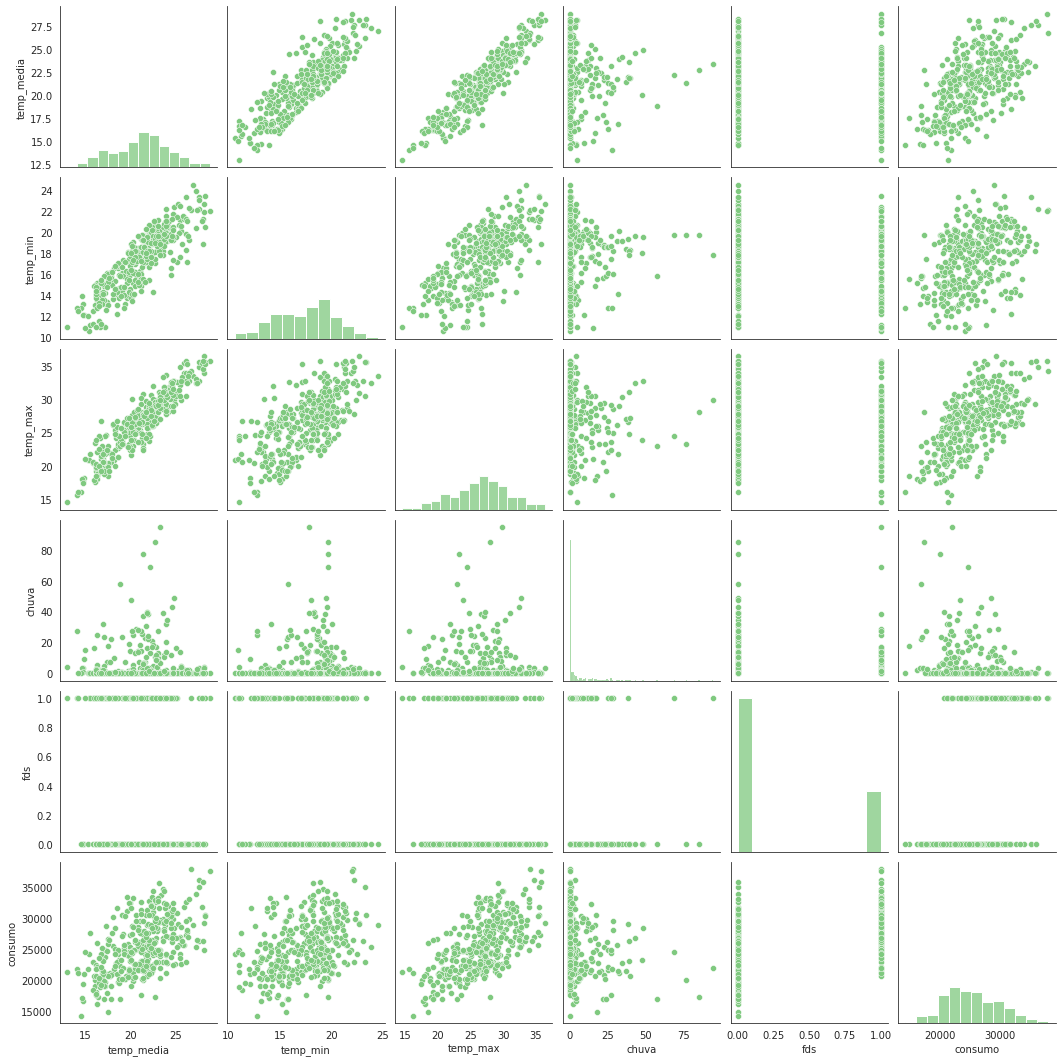

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Pair Plots', fontsize = 18)
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

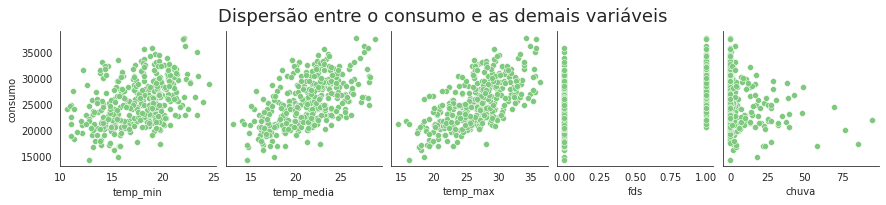

In [ ]:
ax = sns.pairplot(dados,y_vars='consumo',x_vars = ['temp_min','temp_media','temp_max','fds','chuva'])
ax.fig.suptitle('Dispersão entre o consumo e as demais variáveis', fontsize = 18, y = 1.1)
ax=ax

Percebemos que há uma tendência linear com a temperatura, sendo maior na temperatura máxima, com mais erros na temperatura média e muitos erros na temperatura mínima. Há mais consumo em fum de semana. Quando há mais chuva há menos dados de consumo e os dados são de menor consumo.

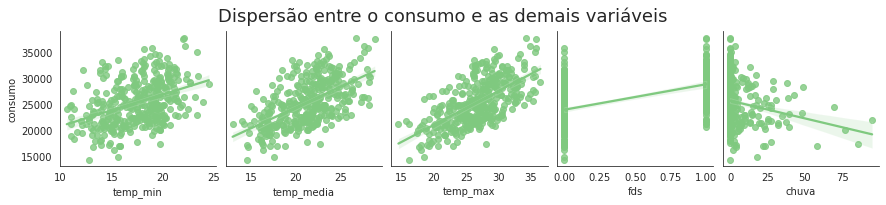

In [ ]:
ax = sns.pairplot(dados,y_vars='consumo',x_vars = ['temp_min','temp_media','temp_max','fds','chuva'],kind = 'reg')
ax.fig.suptitle('Dispersão entre o consumo e as demais variáveis', fontsize = 18, y = 1.1)
ax=ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

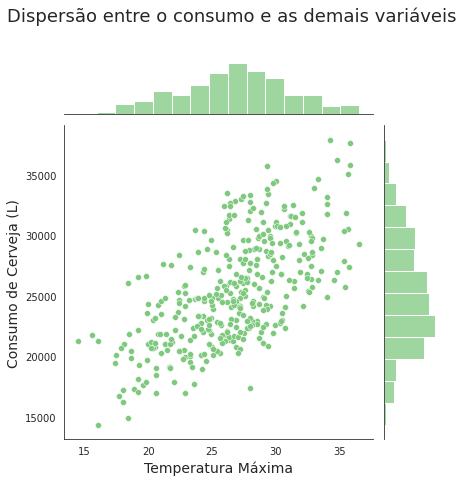

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo',data = dados)
ax.fig.suptitle('Dispersão entre o consumo e as demais variáveis', fontsize = 18, y = 1.1)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja (L)",fontsize = 14)
ax=ax

## Plotando um jointplot com a reta de regressão estimada

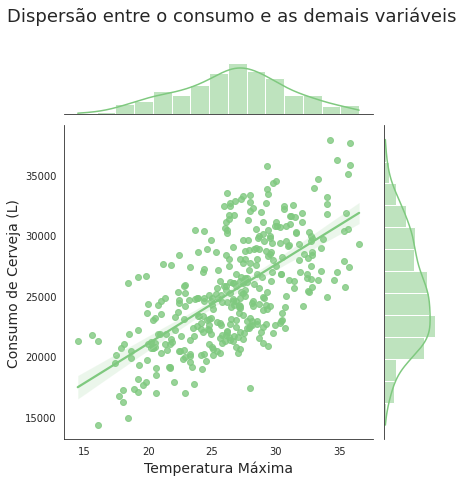

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo',data = dados, kind = 'reg')
ax.fig.suptitle('Dispersão entre o consumo e as demais variáveis', fontsize = 18, y = 1.1)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja (L)",fontsize = 14)
ax=ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

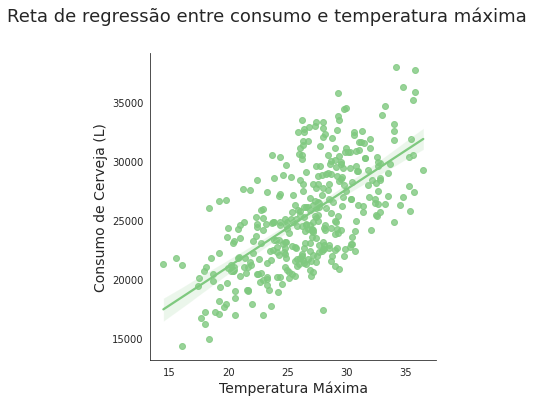

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo',data = dados)
ax.fig.suptitle('Reta de regressão entre consumo e temperatura máxima', fontsize = 18, y = 1.1)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja (L)",fontsize = 14)
ax=ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

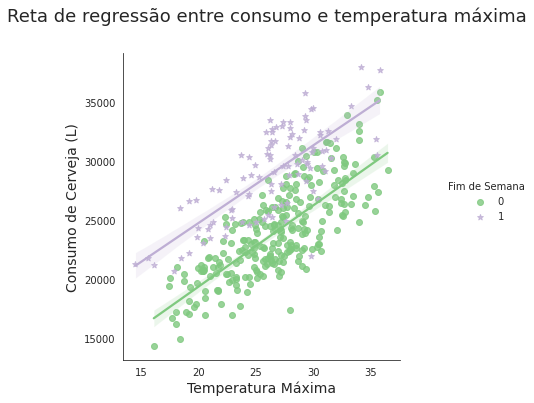

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo',data = dados, hue = 'fds',markers = ['o','*'],legend = False)
ax.fig.suptitle('Reta de regressão entre consumo e temperatura máxima', fontsize = 18, y = 1.1)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja (L)",fontsize = 14)
ax.add_legend(title = 'Fim de Semana')
ax=ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

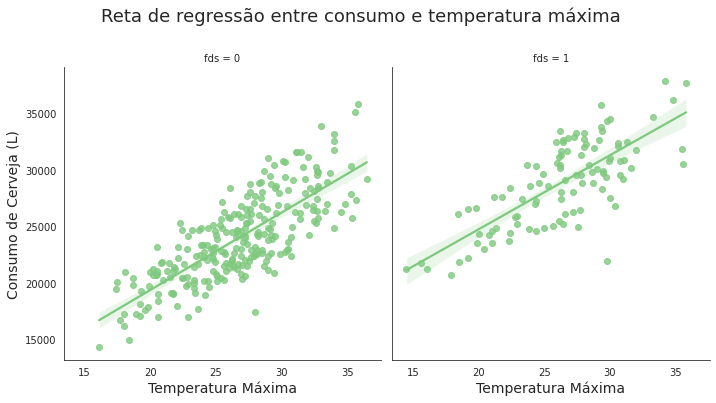

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo',data = dados, col = 'fds')
ax.fig.suptitle('Reta de regressão entre consumo e temperatura máxima', fontsize = 18, y = 1.1)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja (L)",fontsize = 14)
ax=ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
y = dados.consumo
y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: consumo, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['temp_max','chuva','fds']]
X.head()

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0


## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
Y_train.shape

(255,)

In [ ]:
Y_test.shape

(110,)

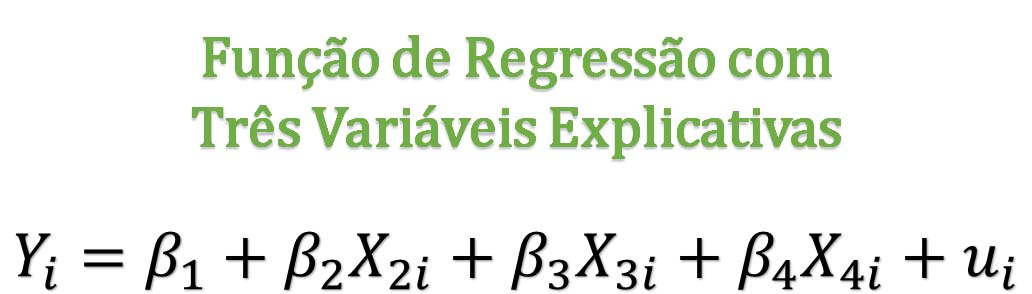

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train, Y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print('R² = {}'.format(modelo.score(X_train,Y_train).round(3)))

R² = 0.705


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R² = %s' % metrics.r2_score(Y_test,y_previsto).round(3))

R² = 0.749


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
193,28.7,0.0,0


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0]

25554.14149913581

## Criando um simulador simples

In [ ]:
temp_max = 30
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva, fds]]

print(f'{modelo.predict(entrada)[0].round(2)} Litros')

25774.63 Litros


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

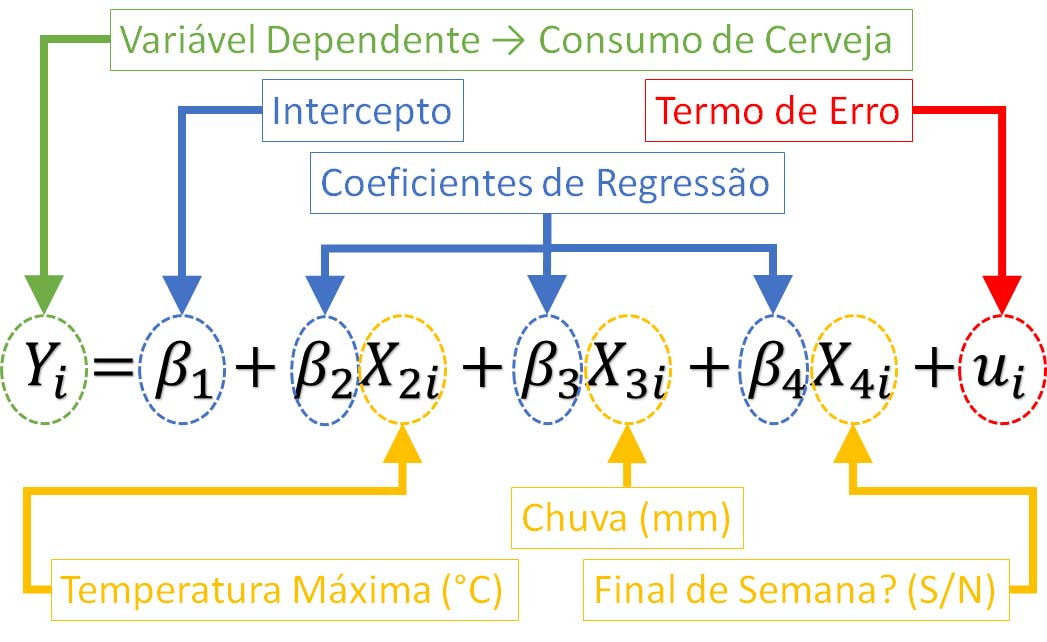

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_

6396.1742286972585

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['Intercepto','Temperatura max','Chuva','fim de semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data = np.append(modelo.intercept_,modelo.coef_).round(2), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,6396.17
Temperatura max,667.52
Chuva,-53.06
fim de semana,5334.97


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>6396,17 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>667,52 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-53,06 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5334,97 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0, 0.5, 'Teste')

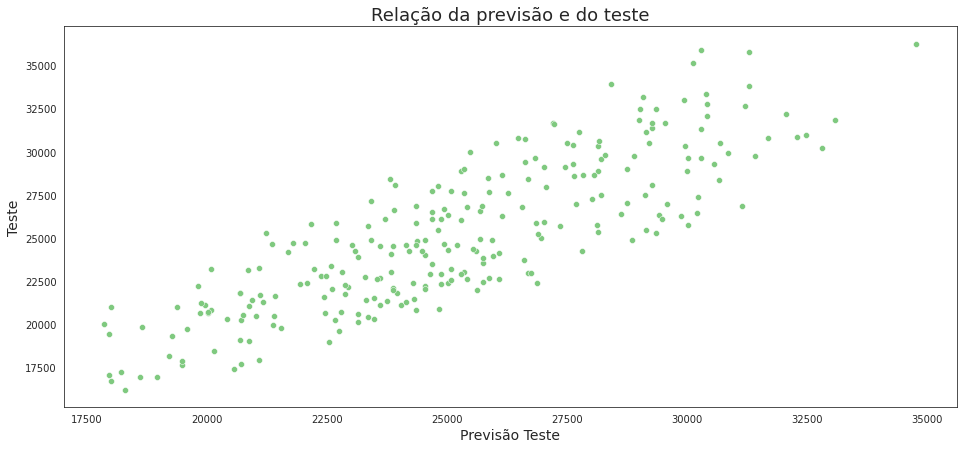

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Relação da previsão e do teste', fontsize = 18)
ax = sns.scatterplot(x = y_previsto_train, y = Y_train)
ax.set_xlabel('Previsão Teste',fontsize = 14)
ax.set_ylabel('Teste',fontsize = 14)

## Obtendo os resíduos

In [ ]:
residuo = Y_train - y_previsto_train
residuo

268    2801.916994
231   -1824.664072
157    1277.699138
19     4998.770364
147    2895.748882
          ...     
71    -2871.339016
106    -852.621893
270   -2975.608727
348     538.234756
102    -931.566523
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Text(0, 0.5, 'Resíduo')

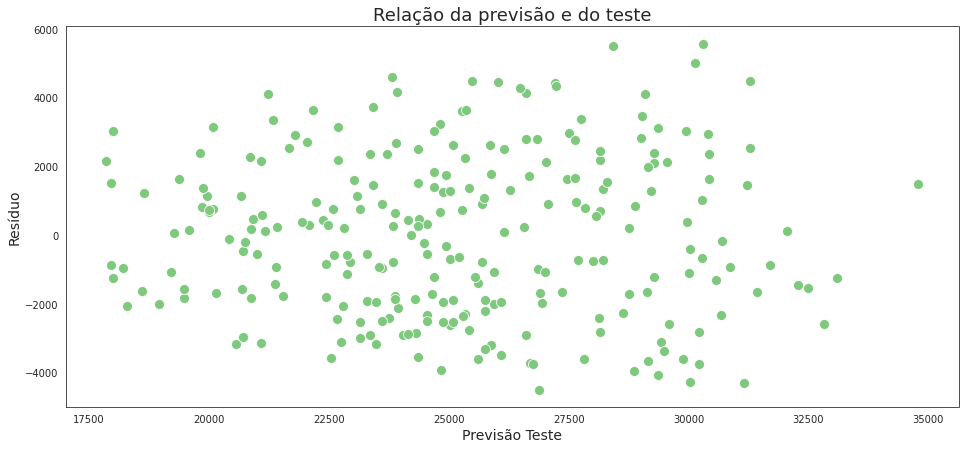

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Relação da previsão e do teste', fontsize = 18)
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s = 100)
ax.set_xlabel('Previsão Teste',fontsize = 14)
ax.set_ylabel('Resíduo',fontsize = 14)

## Utilizando os resíduos ao quadrado

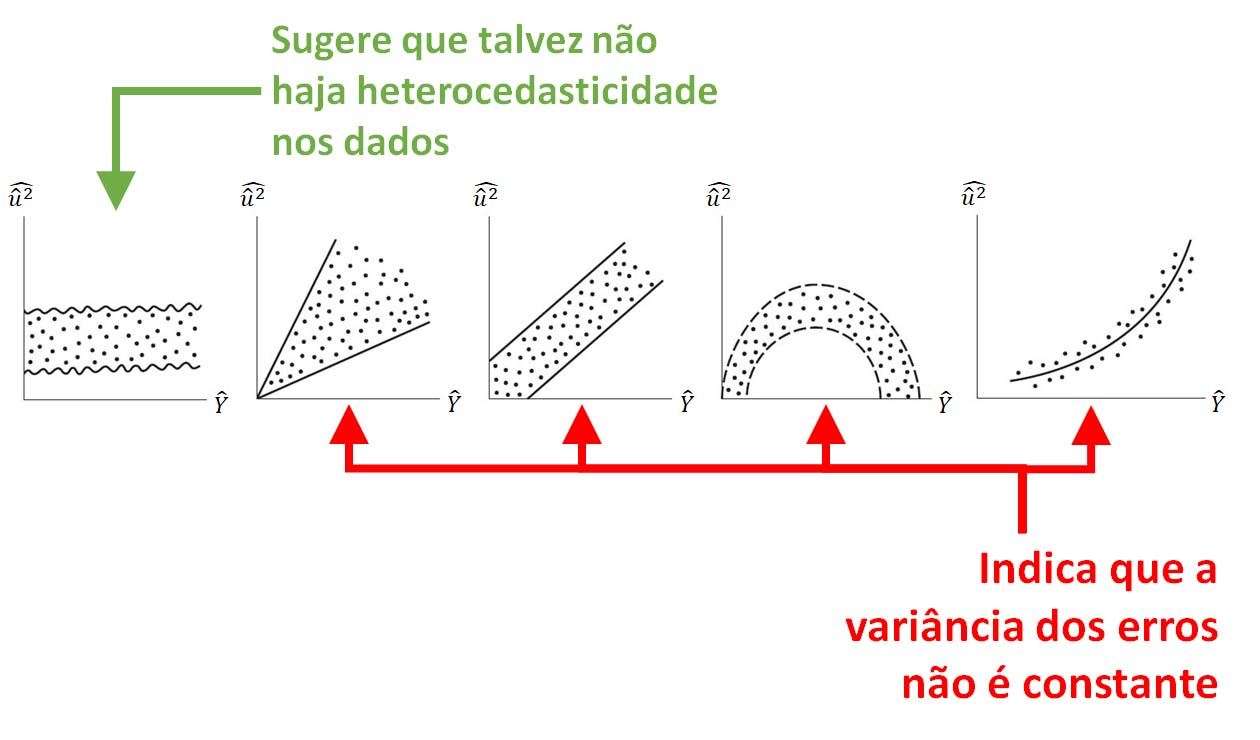
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

Text(0, 0.5, 'Resíduo')

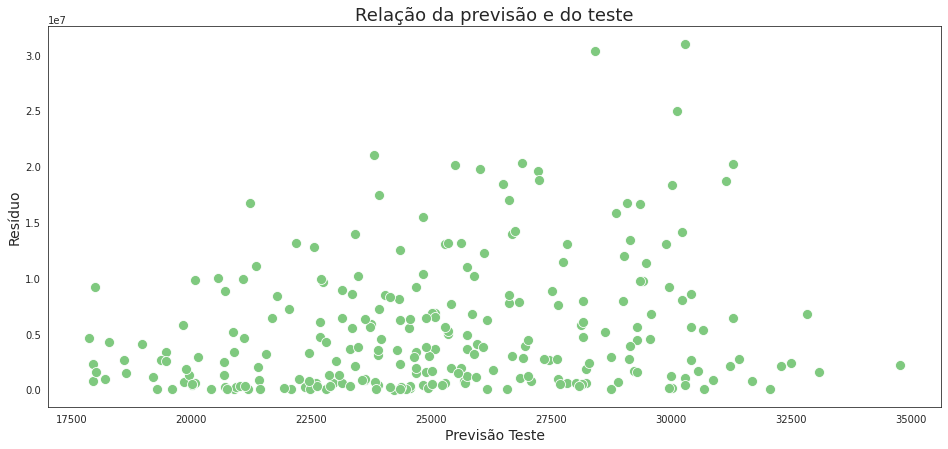

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Relação da previsão e do teste', fontsize = 18)
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s = 100)
ax.set_xlabel('Previsão Teste',fontsize = 14)
ax.set_ylabel('Resíduo',fontsize = 14)

## Plotando a distribuição de frequências dos resíduos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Resíduo')

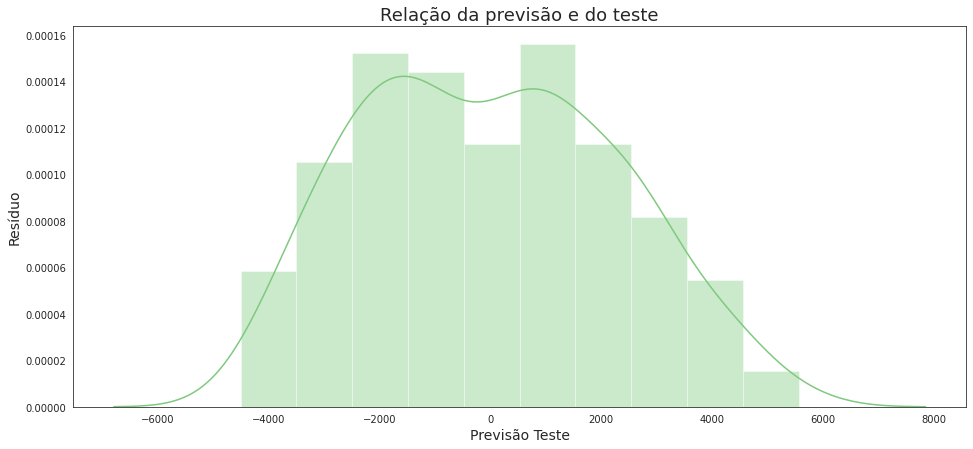

In [ ]:
fig,ax = plt.subplots(figsize = (16,7))
ax.set_title('Relação da previsão e do teste', fontsize = 18)
ax = sns.distplot(residuo)
ax.set_xlabel('Previsão Teste',fontsize = 14)
ax.set_ylabel('Resíduo',fontsize = 14)

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [ ]:
x2 = dados[['temp_media','chuva','fds']]
x2

,temp_media,chuva,fds
0,27.30,0.0,0
1,27.02,0.0,0
2,24.82,0.0,1
3,23.98,1.2,1
4,23.82,0.0,0
...,...,...,...
360,24.00,13.6,1
361,22.64,0.0,0
362,21.68,10.3,0
363,21.38,6.3,0


## Criando os datasets de treino e de teste

In [ ]:
X2_train, X2_test,Y2_train, Y2_test = train_test_split( x2, y, random_state = 100)

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
modelo2.fit(X2_train, Y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print('R² = {}'.format(modelo2.score(X2_train,Y2_train).round(3)))

R² = 0.673


In [ ]:
print('R² = {}'.format(modelo.score(X_train,Y_train).round(3)))

R² = 0.705


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
y_previsto2 = modelo2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print('R² = {}'.format(metrics.r2_score(Y_test,y_previsto)))

R² = 0.7487244453450828


In [ ]:
print('R² = {}'.format(metrics.r2_score(Y2_test,y_previsto2)))

R² = 0.6028777560624103


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [ ]:
EQM2 = metrics.mean_squared_error(Y2_test, y_previsto2).round(2)
REQM2 = np.sqrt(EQM2).round(2)
R2_2 = metrics.r2_score(Y2_test, y_previsto2).round(2)

pd.DataFrame([EQM2,REQM2,R2_2],index = ['EQM','REQM','R²'], columns = ['Métricas'])

,Métricas
EQM,5662494.79
REQM,2379.60
R²,0.60


In [ ]:
EQM = metrics.mean_squared_error(Y_test, y_previsto).round(2)
REQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(Y_test, y_previsto).round(2)

pd.DataFrame([EQM,REQM,R2],index = ['EQM','REQM','R²'], columns = ['Métricas'])

,Métricas
EQM,5480853.46
REQM,2341.12
R²,0.75


## Obtendo métricas para o modelo com Temperatura Máxima

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
X_test[0:1]

,temp_max,chuva,fds
193,28.7,0.0,0


In [ ]:
entrada

[[30, 12.2, 0]]

## Gerando previsão pontual

In [ ]:
print(modelo.predict(entrada)[0])

25774.626385064425


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Criando um simulador simples

In [ ]:
temp_max = 30
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva, fds]]

print(f'{modelo.predict(entrada)[0].round(2)} Litros')

25774.63 Litros


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [ ]:
import pickle

In [ ]:
output =  open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo,output)
output.close

<function BufferedWriter.close>

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```